In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister,ClassicalRegister
from qiskit_machine_learning.neural_networks import EstimatorQNN,SamplerQNN
from IPython.display import clear_output
import matplotlib.pyplot as plt
import qiskit.quantum_info as qi
from qiskit.circuit import ParameterVector
from qiskit_algorithms.utils import algorithm_globals
import time 
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import EfficientSU2,RealAmplitudes
import numpy as np

import pickle 
import time
from qiskit.circuit.library import iSwapGate

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator
from qiskit.circuit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator
from collections import defaultdict
import json

In [2]:
J=1
nQ=7
n_qubits=3*nQ
sqrt_iSWAP = iSwapGate().power(1/2)

nShots = 100000 
dtFactor=0.2
nSteps=10

matter_defect = 11
f= 5

In [3]:
def add3Q(circuit,tmpIndex,alpha=J):
    tmpIndex1=(tmpIndex+1)%(n_qubits)
    tmpIndex2=(tmpIndex+2)%(n_qubits)
    
    circuit.append(sqrt_iSWAP, [tmpIndex, tmpIndex1])
    circuit.append(sqrt_iSWAP, [tmpIndex, tmpIndex1])
    #circuit.barrier()
    circuit.rz(np.pi,tmpIndex)
    circuit.rz(-np.pi/4,tmpIndex1)
    circuit.rz(-np.pi/4,tmpIndex2)
    circuit.append(sqrt_iSWAP, [tmpIndex1, tmpIndex2])
    
    circuit.rz(np.pi-alpha,tmpIndex1)
    circuit.rz(alpha,tmpIndex2)
    circuit.append(sqrt_iSWAP, [tmpIndex1, tmpIndex2])
    circuit.rz(np.pi/4,tmpIndex1)
    circuit.rz(np.pi/4,tmpIndex2)
    #circuit.barrier()
            
    circuit.append(sqrt_iSWAP, [tmpIndex, tmpIndex1])
    circuit.append(sqrt_iSWAP, [tmpIndex, tmpIndex1])
    
    
def getTrotterCircuit(n_qubits,J,nTrotter=2,fFactor=0.2,dtFactor=0.2,matter_defect=[6,16]):
    f=fFactor*J
    print("f = ",f)
    dt=dtFactor/J
    
    circuit = QuantumCircuit(n_qubits)
    #circuit = QuantumCircuit(n_qubits,n_qubits)
    
    #First produce the initial state:
    for i in range(n_qubits):
        defect_flag=False

        for index in matter_defect:
            if i== index - 1:
                defect_flag=True

        if defect_flag==False:
            if i%2!=0:
                circuit.h(i)
                
            else:
                circuit.x(i)
 
    #Trotterization:
    for step in range(nTrotter):
        
        circuit.barrier()
        
        
        
        for i in range(int(n_qubits/4)):
            tmpIndex=i*4
            add3Q(circuit,tmpIndex,alpha=J*dt)
        circuit.barrier()
        
        n_end=0# no period
        for i in range(int(n_qubits/4)-n_end):
            tmpIndex=i*4+2
            add3Q(circuit,tmpIndex,alpha=J*dt)
        circuit.barrier()
        
        
        
        for i in range(int(n_qubits/2)):
            tmpIndex=i*2
            circuit.rz(0,tmpIndex)
            circuit.rx(f*dt,tmpIndex+1)
        #Adding last rotation gate if it is an odd number
        if tmpIndex+1 == n_qubits-2:
            circuit.rz(0,tmpIndex+2)
        
    for i in range(n_qubits):
        if i%2 ==1:
            circuit.h(i)
    
    circuit.measure_all()
    return circuit

In [5]:
# from qiskit_ibm_runtime import QiskitRuntimeService
# # Save an IBM Quantum account and set it as your default account.
# #service = QiskitRuntimeService(channel="ibm_quantum",instance="utokyo-kawasaki/internal/icepp-r5",token="")
# #QiskitRuntimeService.save_account(channel="ibm_quantum",overwrite=True,instance="utokyo-kawasaki/internal/icepp-r5", token="", set_as_default=True)

# service = QiskitRuntimeService()
# service.backends()
# backend = service.least_busy(operational=True, simulator=False)
# pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
# backend.status()

In [6]:
backend.status()

In [11]:

# jobs_list = []

# with Session(backend=backend) as session:
# #     sampler_em = Sampler(mode = session, options={"resilience_level": 2})
#     sampler_em = Sampler(mode = session)

#     sampler_em.options.dynamical_decoupling.enable = True
#     sampler_em.options.twirling.enable_gates = True
#     #sampler_em.options.resilience.measure_mitigation = True


#     for i in range(nSteps):
#         print("current step = ", i)
#         circuit = getTrotterCircuit(n_qubits,J,nTrotter=i,fFactor=f,dtFactor=dtFactor,matter_defect=[matter_defect])
#         isa_qc = pm.run(circuit)
        
    
#         job = sampler_em.run([(isa_qc,[])],shots = nShots)

        
#         jobs_list.append(job)

#         print(f"job ID: {job.job_id()}")
       

current step =  0
f =  5
job ID: ctp50bh4gjh0008pmkjg
current step =  1
f =  5
job ID: ctp50c16g3rg0087h9cg
current step =  2
f =  5
job ID: ctp50chx7b5g0080mbqg
current step =  3
f =  5
job ID: ctp50d16g3rg0087h9dg
current step =  4
f =  5
job ID: ctp50dhx7b5g0080mbr0
current step =  5
f =  5
job ID: ctp50e1sj17g00824xzg
current step =  6
f =  5
job ID: ctp50essj17g00824y00
current step =  7
f =  5
job ID: ctp50f9x7b5g0080mbs0
current step =  8
f =  5
job ID: ctp50fsx7b5g0080mbsg
current step =  9
f =  5
job ID: ctp50gjsj17g00824y0g


In [7]:
jobs_list = [
     service.job("ctp50bh4gjh0008pmkjg"),
    service.job("ctp50c16g3rg0087h9cg"),
    service.job("ctp50chx7b5g0080mbqg"),
    service.job("ctp50d16g3rg0087h9dg"),
    service.job("ctp50dhx7b5g0080mbr0"),
    service.job("ctp50e1sj17g00824xzg"),
    service.job("ctp50essj17g00824y00"),
    service.job("ctp50f9x7b5g0080mbs0"),
    service.job("ctp50fsx7b5g0080mbsg"),
    service.job("ctp50gjsj17g00824y0g")
]

In [8]:
string_list = []
for job in jobs_list:
    r = job.result()
    string = r[0].data.meas.get_counts()
    string_list.append(string)
    print(f"job ID: {job.job_id()}")
    

job ID: ctp50bh4gjh0008pmkjg
job ID: ctp50c16g3rg0087h9cg
job ID: ctp50chx7b5g0080mbqg
job ID: ctp50d16g3rg0087h9dg
job ID: ctp50dhx7b5g0080mbr0
job ID: ctp50e1sj17g00824xzg
job ID: ctp50essj17g00824y00
job ID: ctp50f9x7b5g0080mbs0
job ID: ctp50fsx7b5g0080mbsg
job ID: ctp50gjsj17g00824y0g


In [9]:

with open(f'stringList_{matter_defect}_{f}.json', 'w') as fout:
    json.dump(string_list, fout)
    
    
with open(f'stringList_{matter_defect}_{f}.json', 'r') as fin:
     string_list_all = json.load(fin)


In [10]:
def checkZ2Charge(key):
    charge = []
    firstCharge_pos = 0
    for i in np.arange(0,len(key),1): # Assuming first and last are matter site.
        #assuming matter sites are all even
        #it is backward!

        if i%2 == 0:
            charge.append(int(key[i]))
            if int(key[i]) == 0:
                firstCharge_pos = i 
            
    charge = np.array(charge)

    return charge.sum(),firstCharge_pos,charge

In [11]:
initial_charge = 10
key = list(string_list_all[0].keys())[0]
initial_charge_position = n_qubits-matter_defect

initialKey = '101010101000101010101'
initialKey[initial_charge_position]


'0'

In [12]:
def getEVs(string,wiggleRoom = 0,initialKey = initialKey):
    out = np.zeros(n_qubits)
    shots = 0
    
    n_charge = []
    
    for key in list(string.keys()):
                
        
        charge, charge_position,charge_arr = checkZ2Charge(key)
        for j in range(string[key]):
            n_charge.append(charge - initial_charge)
        
        if abs(charge - initial_charge) > wiggleRoom:
            continue

        tmpKey = np.array([int(numeric_string) for numeric_string in initialKey])  

        if charge_position == initial_charge_position:
            tmpKey = tmpKey #do nothing

        else:
            tmpKey[initial_charge_position] = 1
            tmpKey[charge_position] = 0
            #then flip the links
            
            if charge_position > initial_charge_position:
                for pos in np.arange(initial_charge_position+1,charge_position,1):
                    if pos%2 ==1: #flip link
                        tmpKey[pos] = 1
                        
            else:
                for pos in np.arange(charge_position+1, initial_charge_position,1):
            
                    if pos%2 ==1: #flip link
                        tmpKey[pos] = 1
                  
  
        arr = 1 -2*tmpKey #|0> to have eigenValue of 1, and |1> to have -1.
        
        for i in range(arr.shape[0]): #introduce a negative sign for all the matter site
            if i%2==0:
                arr[i] = -arr[i]
        

        out += arr*string[key]
        shots += string[key]
    output = out/shots
    
    return (output+1)/2, np.array(n_charge)

In [13]:
wiggle_room = 0
evs_list = []

for string in string_list_all:
    evs_list.append(getEVs(string)[0])
    
evs_list = np.array(evs_list)

In [14]:

    
from matplotlib import colormaps
list(colormaps)
cmap = 'gist_heat'


<Figure size 640x480 with 0 Axes>

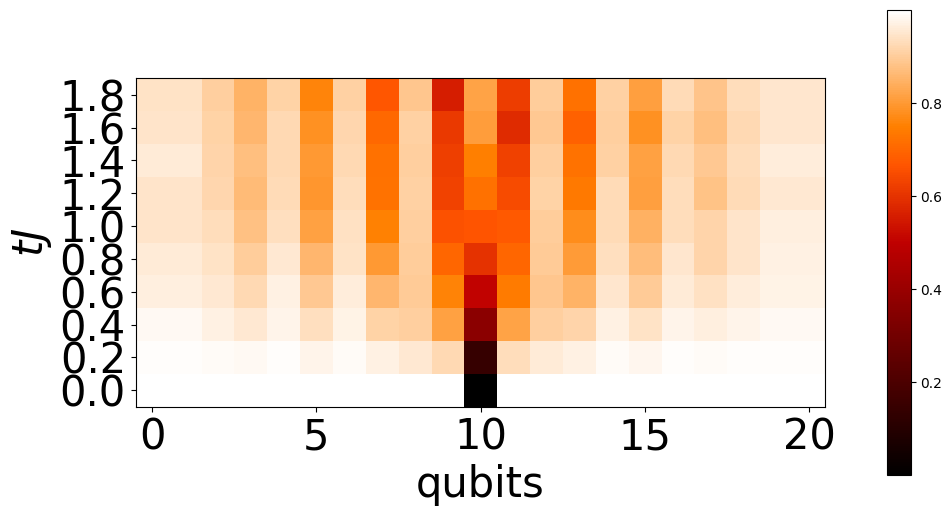

In [15]:

LabelSize=30
plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(evs_list, interpolation='none',origin='lower',cmap = cmap)

y=dtFactor*J*np.arange(0,len(evs_list),1)
plt.yticks(range(len(y)), np.round(y,2))
plt.xlabel('qubits',fontsize=LabelSize)
plt.ylabel(r'$tJ$',fontsize=LabelSize)
plt.tick_params(axis='both', which='major', labelsize=LabelSize)
plt.colorbar(fraction=0.03, pad=0.08)
plt.savefig(f"deconf_{f}_siteOnly.png", dpi=100,bbox_inches='tight')


In [16]:
f

5

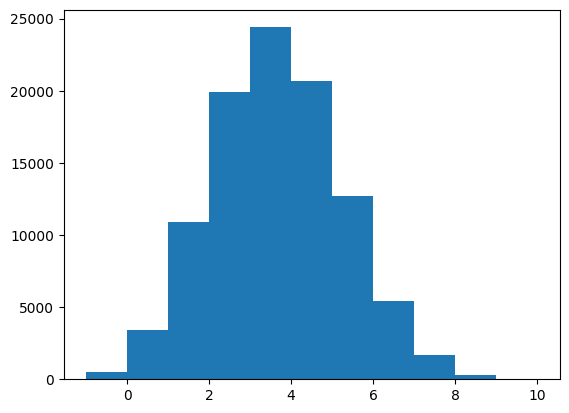

In [17]:
n_string_list = -1
n_sites = 11
o,n_charge_diff = getEVs(string_list_all[n_string_list])
a = plt.hist(-n_charge_diff,bins = np.arange(-1,11,1))
dCharge_counts = a[0]

In [18]:
err_avg = (dCharge_counts *(a[1][0:-1]+a[1][1:])/2).sum()/dCharge_counts.sum()
E = err_avg/n_sites

In [19]:
n_shots0 = dCharge_counts[1]

In [20]:
b = E*(11-1)*E*(1-E)**(11-2)
a = (1-E)**(11-1)
fake_rate = b/(a+b)

In [21]:
charge_list = []
for i in range(evs_list[n_string_list].shape[0]):
    if i%2 == 0:
        charge_list.append(evs_list[n_string_list][i])
charge_list = np.array(charge_list)

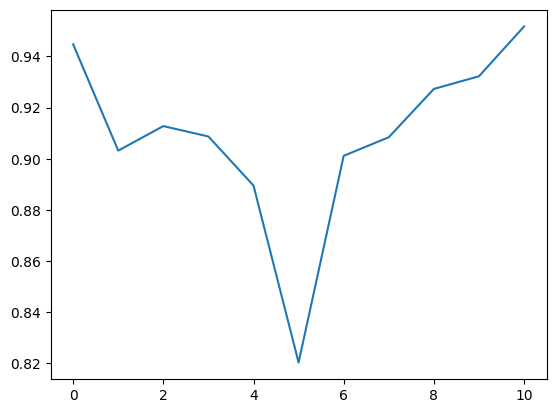

In [22]:
plt.plot(charge_list)

In [23]:


p = (1-charge_list)/2
print(p)
n0=p*n_shots0
n1=(1-p)*n_shots0



[0.02762431 0.04841524 0.04361733 0.04565281 0.05524862 0.0898517
 0.04943297 0.0457982  0.03634778 0.03387613 0.02413492]


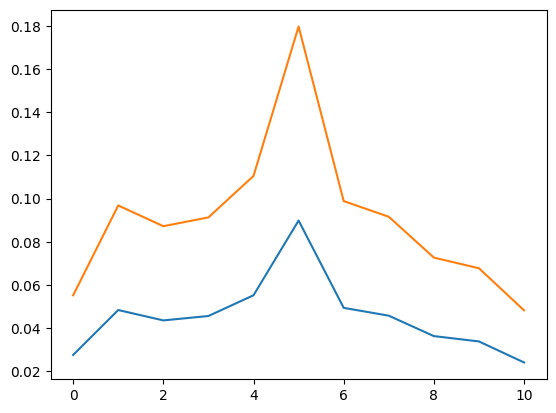

In [24]:
plt.plot(p)
plt.plot(p/p.sum())

In [25]:

fake_contribution = n_shots0 * fake_rate

# n0 = n0 - fake_contribution/11


In [26]:
n_shots0*fake_rate/11

195.3854033441018

In [27]:
string = string_list_all[n_string_list]
n_err = 3
charge_arr_n1 = []
charge_arr_0 = []
charge_arr_large = []
charge_arr_bits = []


for key in list(string.keys()):

        charge, charge_position,charge_arr = checkZ2Charge(key)
        if charge - initial_charge == -1:
            for j in range(string[key]):
                charge_arr_n1.append(np.where(charge_arr == 0)[0])
            
        if charge - initial_charge == -n_err:
            
            for j in range(string[key]):
                charge_arr_large.append(np.where(charge_arr == 0)[0])
            
        if charge - initial_charge == 0:
            for j in range(string[key]):
                #print(charge_position,np.where(charge_arr == 0)[0])
                #charge_arr_0.append(np.where(charge_arr == 0)[0])
                charge_arr_0.append(charge_position/2)

                arr_bits = np.ones(11)
                arr_bits[int(charge_position/2)]=0
                charge_arr_bits.append(arr_bits)
           
            
charge_arr_n1 = np.array(charge_arr_n1)
charge_arr_0 = np.array(charge_arr_0)
charge_arr_large = np.array(charge_arr_large)
charge_arr_bits=np.array(charge_arr_bits)

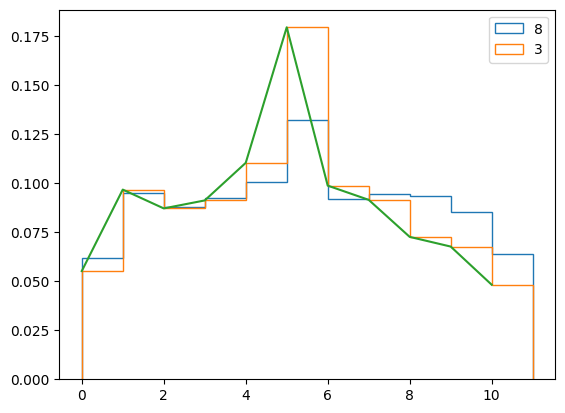

In [28]:

alarge = plt.hist(charge_arr_large.flatten(),histtype='step',label=8,bins=np.arange(0,12,1),weights = np.ones(charge_arr_large.flatten().shape[0])/charge_arr_large.flatten().shape[0]);
a0 = plt.hist(charge_arr_0.flatten(),histtype='step',label=n_err,bins=np.arange(0,12,1),weights = np.ones(charge_arr_0.flatten().shape[0])/charge_arr_0.flatten().shape[0]);
plt.plot(n0/n0.sum())
plt.legend()

In [29]:
#find the part that is zero:
n_0_measured = n_shots0 * p

#fakes in it:
n_0_fake_all = (n_0_measured*fake_rate).sum()
n_0_fake = np.ones(11)*n_0_fake_all/11

n_0_truth =  n_0_measured - n_0_fake

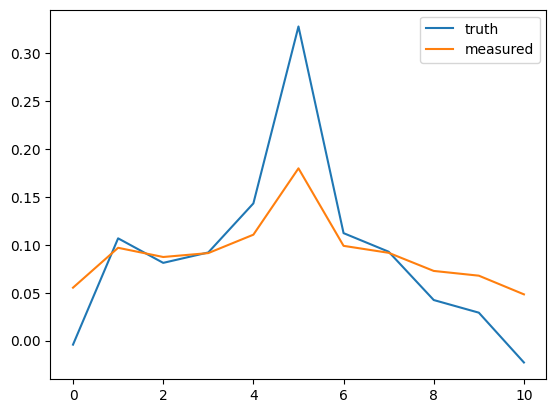

In [30]:

plt.plot(n_0_truth/n_0_truth.sum(),label='truth')
plt.plot(n0/n0.sum(),label='measured')
plt.legend()

In [31]:
truth_rate = 1-fake_rate
new_shots = n_shots0 * truth_rate
new_charge_counts = - ( n_0_truth  - (new_shots  - n_0_truth) )/new_shots 
# new_nShots0 = (n_shots0*0.35)
# new_charge_counts = - (new_nShots0*)

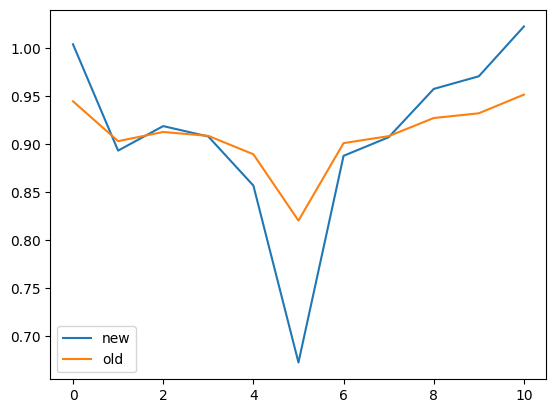

In [32]:
plt.plot(new_charge_counts,label='new')

plt.plot(charge_list,label='old')
plt.legend()

In [ ]:
# nIter = 50000
# n_ones_list = []
# qubits = np.ones(11)
# charge_ind = 1
# qubits[charge_ind] = 0

# for i in range(nIter):
#     n_ones = 10

#     for j in range(qubits.shape[0]):

#         r = np.random.rand(1)[0]
        
#         if r <= E:
#             change_flag = True

#             if j == charge_ind:
                
#                 n_ones+=1

#             else:
#                 n_ones-=1
            

  
#     n_ones_list.append(n_ones)
# n_ones_list = np.array(n_ones_list)  

# n_ones_diff = (10 - n_ones_list)
# bins = np.arange(-2,13,0.2)
# a = plt.hist(n_ones_diff,bins = bins,histtype='step',weights = np.ones(n_ones_diff.shape[0])/n_ones_diff.shape[0]);

# xx = np.array([-1. , 0. ,  1. ,  2. ,  3. ,  4. ,
#         5. ,   6. ,   7. ,    8. ,    9. ])

# plt.scatter(xx,dCharge_counts/dCharge_counts.sum());

In [ ]:
wiggle_room = 0

evs_list = []
for string in string_list_all:
    evs_list.append(getEVs(string)[0])


In [ ]:
wiggle_room = 0

evs_list = []
for string in string_list_all:
    evs_list.append(getEVs(string)[0])

    
from matplotlib import colormaps
list(colormaps)
cmap = 'gist_heat'

LabelSize=30
plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(evs_list, interpolation='none',origin='lower',cmap = cmap)

y=dtFactor*J*np.arange(0,len(evs_list),1)
plt.yticks(range(len(y)), np.round(y,2))
plt.xlabel('qubits',fontsize=LabelSize)
plt.ylabel(r'$tJ$',fontsize=LabelSize)
plt.tick_params(axis='both', which='major', labelsize=LabelSize)
plt.colorbar(fraction=0.03, pad=0.08)
plt.savefig(f"deconf_{f}_siteOnly.png", dpi=100,bbox_inches='tight')

In [ ]:
LabelSize=30
plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(evs_list, interpolation='none',origin='lower',cmap = cmap)

y=dtFactor*J*np.arange(0,len(evs_list),1)
plt.yticks(range(len(y)), np.round(y,2))
plt.xlabel('qubits',fontsize=LabelSize)
plt.ylabel(r'$tJ$',fontsize=LabelSize)
plt.tick_params(axis='both', which='major', labelsize=LabelSize)
plt.colorbar(fraction=0.03, pad=0.08)
plt.savefig(f"deconf_{f}_siteOnly.png", dpi=100,bbox_inches='tight')

In [ ]:
plt.plot(evs_list[-7],label = -7)
plt.plot(evs_list[-5],label = -5)
plt.plot(evs_list[-3],label = -3)
plt.plot(evs_list[-1],label = -1)
#plt.ylim(0,1)
plt.grid()
plt.legend()

In [ ]:
charge_list = []
for i in range(evs_list[n_string_list].shape[0]):
    if i%2 == 0:
        charge_list.append(evs_list[n_string_list][i])
charge_list = np.array(charge_list)

In [ ]:
charge_list_5 = []
nnn = 8
for i in range(evs_list[nnn].shape[0]):
    if i%2 == 0:
        charge_list_5.append(evs_list[nnn][i])
charge_list_5 = np.array(charge_list_5)

In [ ]:
plt.plot(charge_list,label=-1)
plt.plot(charge_list_5,label = nnn)
plt.legend()

In [ ]:
n_shots0 = 3223

In [ ]:
d = 1-charge_list

In [ ]:
d = 1-charge_list

n1 = (charge_list+d/2)*n_shots0
n0 = (d/2)*n_shots0
print(n0)
print(n1)

In [ ]:
(n1-n0)/n_shots0

In [ ]:
#According to noise, 65% is fake, fake gives ~ uniform distrbution
fake_contribution = n_shots0 *0.65

n0 = n0 - fake_contribution/11


In [ ]:
fake_contribution/11

In [ ]:
n1

In [ ]:
string = string_list_all[n_string_list]
n_err = 3
charge_arr_n1 = []
charge_arr_0 = []
charge_arr_large = []
charge_arr_bits = []
for key in list(string.keys()):

        charge, charge_position,charge_arr = checkZ2Charge(key)
        if charge - initial_charge == -1:
            for j in range(string[key]):
                charge_arr_n1.append(np.where(charge_arr == 0)[0])
            
        if charge - initial_charge == -n_err:
            
            for j in range(string[key]):
                charge_arr_large.append(np.where(charge_arr == 0)[0])
            
        if charge - initial_charge == 0:
            for j in range(string[key]):
                #print(charge_position,np.where(charge_arr == 0)[0])
                #charge_arr_0.append(np.where(charge_arr == 0)[0])
                charge_arr_0.append(charge_position/2)

                arr_bits = np.ones(11)
                arr_bits[int(charge_position/2)]=0
                charge_arr_bits.append(arr_bits)
           
            
charge_arr_n1 = np.array(charge_arr_n1)
charge_arr_0 = np.array(charge_arr_0)
charge_arr_large = np.array(charge_arr_large)
charge_arr_bits=np.array(charge_arr_bits)

In [ ]:
plt.hist(charge_pos_list/2,bins=np.arange(0,12,1));

In [ ]:
#plt.hist(charge_arr_n1.flatten(),histtype='step');
alarge = plt.hist(charge_arr_large.flatten(),histtype='step',label=8,bins=np.arange(0,12,1),weights = np.ones(charge_arr_large.flatten().shape[0])/charge_arr_large.flatten().shape[0]);
a0 = plt.hist(charge_arr_0.flatten(),histtype='step',label=n_err,bins=np.arange(0,12,1),weights = np.ones(charge_arr_0.flatten().shape[0])/charge_arr_0.flatten().shape[0]);
#plt.hist(charge_pos_list/2,bins=np.arange(0,12,1));
plt.legend()

In [ ]:
charge_counts_0 = n_shots0*a0[0]
charge_counts_0_fake = n_shots0*0.65*alarge[0]
#charge_counts_0_fake = n_shots0*0.65*np.ones_like(a0[0])/11

In [ ]:
charge_counts_0_truth = charge_counts_0 - charge_counts_0_fake
plt.plot(charge_counts_0_truth/charge_counts_0_truth.sum())

In [ ]:
plt.plot(charge_counts_0_truth/charge_counts_0_truth.sum())

In [ ]:
new_charge_counts = - ( charge_counts_0_truth  - (n_shots0*0.35 - charge_counts_0_truth) )/(n_shots0*0.35)

In [ ]:


n_shots0

In [ ]:
plt.plot(new_charge_counts)
plt.plot(charge_list)

In [ ]:
charge_counts_0